In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from pandas.plotting import scatter_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')
import os



In [63]:
a= pd.read_csv("Admission_Predict_Ver1.1.csv")

In [64]:
#seeing the dataset
a.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [65]:
print('Data Show Describe\n')
a.describe()

Data Show Describe



,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [66]:
#here we will check for null values
print('Data Show Info\n')
a.info()

Data Show Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


In [67]:
a=a.rename(columns={'Serial No.':'SerialNo','GRE Score':'GREScore','TOEFL Score':'TOEFLScore','LOR ':'LOR','University Rating':'UniversityRating','Chance of Admit ':'ChanceOfAdmit'})

In [68]:
print('Data Show Columns')
a.columns

Data Show Columns


Index(['SerialNo', 'GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR',
       'CGPA', 'Research', 'ChanceOfAdmit'],
      dtype='object')

In [69]:
a.isnull().values.any()

False

In [70]:
a.drop(['SerialNo'], axis = 1, inplace =True)

In [71]:
print('Data Show Is NULL')
a.isnull().sum()

Data Show Is NULL


GREScore            0
TOEFLScore          0
UniversityRating    0
SOP                 0
LOR                 0
CGPA                0
Research            0
ChanceOfAdmit       0
dtype: int64

In [72]:
def Admit_Chance (a):
    if a['ChanceOfAdmit'] >=0.70:
      return 1
    else:
      return 0
    

In [73]:
a['Admit']=a.apply (lambda a: Admit_Chance(a), axis=1)
a['Admit']=a['Admit'].astype(str)

In [74]:
a.head()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit,Admit
0,337,118,4,4.5,4.5,9.65,1,0.92,1
1,324,107,4,4.0,4.5,8.87,1,0.76,1
2,316,104,3,3.0,3.5,8.00,1,0.72,1
3,322,110,3,3.5,2.5,8.67,1,0.80,1
4,314,103,2,2.0,3.0,8.21,0,0.65,0


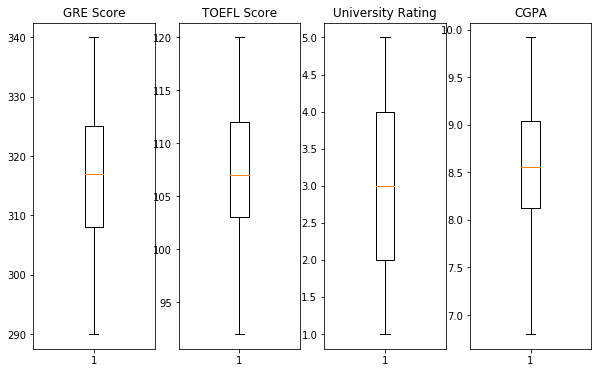

In [75]:
plt.figure(1, figsize=(10,6))
plt.subplot(1,4, 1)
plt.boxplot(a['GREScore'])
plt.title('GRE Score')

plt.subplot(1,4,2)
plt.boxplot(a['TOEFLScore'])
plt.title('TOEFL Score')

plt.subplot(1,4,3)
plt.boxplot(a['UniversityRating'])
plt.title('University Rating')

plt.subplot(1,4,4)
plt.boxplot(a['CGPA'])
plt.title('CGPA')

plt.show()

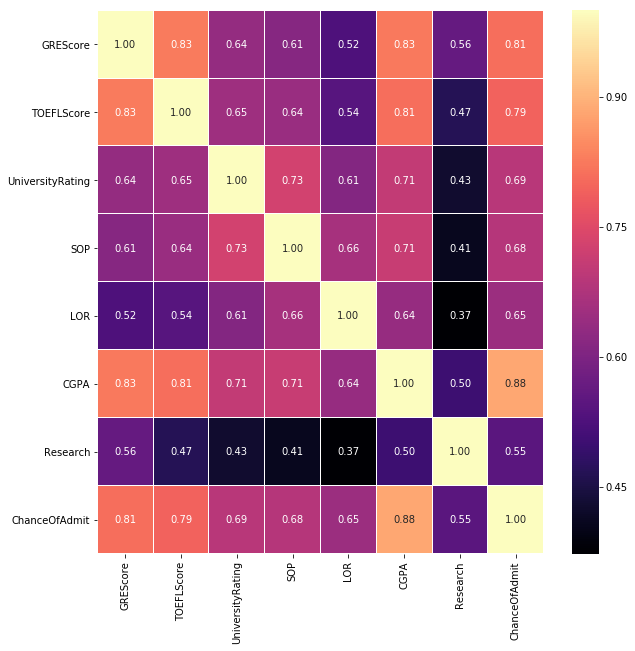

In [76]:
plt.figure(figsize=(10, 10))
sns.heatmap(a.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

In [77]:
a.corr()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit
GREScore,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFLScore,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
UniversityRating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
ChanceOfAdmit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


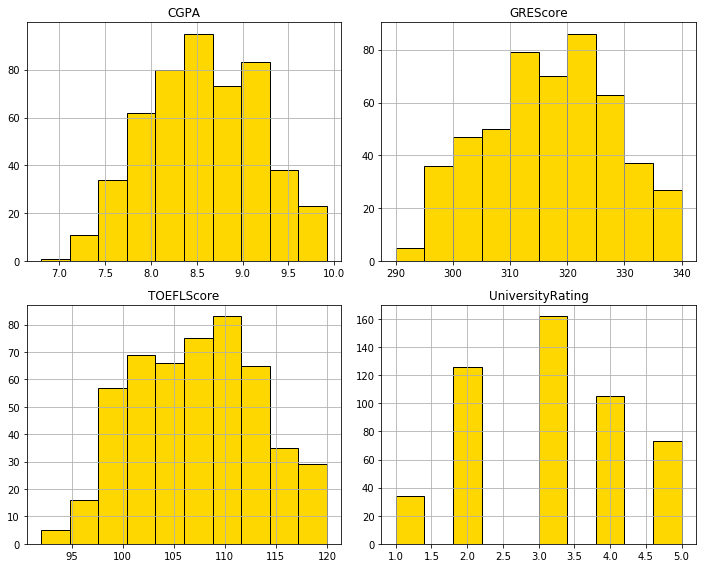

In [78]:
a[['GREScore','TOEFLScore','UniversityRating','CGPA']].hist(figsize=(10,8),bins=10,color='#ffd700',linewidth='1',edgecolor='k')
plt.tight_layout()
plt.show()

In [79]:
c=a

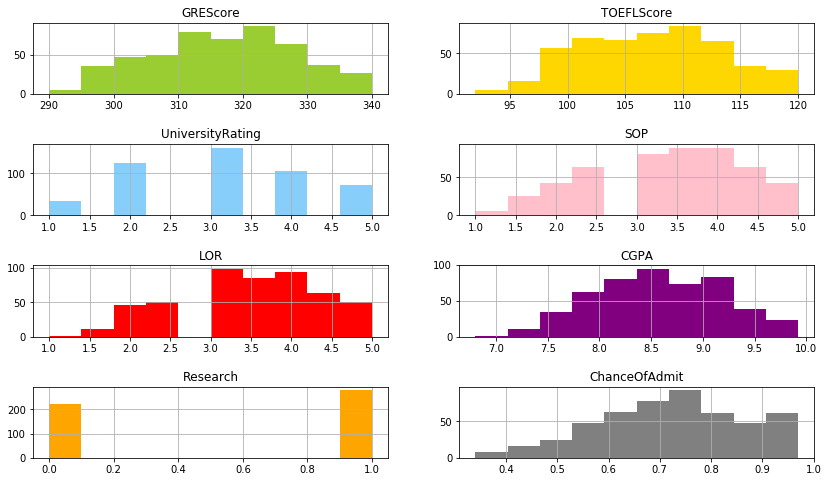

In [80]:
category = ['GREScore','TOEFLScore','UniversityRating','SOP','LOR','CGPA','Research','ChanceOfAdmit']
color = ['yellowgreen','gold','lightskyblue','pink','red','purple','orange','gray']
start = True
for i in np.arange(4):
    
    if start == True:
        fig = plt.figure(figsize=(14,8))
        start = False
        
    plt.subplot2grid((4,2),(i,0))
    a[category[2*i]].hist(color=color[2*i],bins=10)
    plt.title(category[2*i])
    plt.subplot2grid((4,2),(i,1))
    a[category[2*i+1]].hist(color=color[2*i+1],bins=10)
    plt.title(category[2*i+1])
    
plt.subplots_adjust(hspace = 0.7, wspace = 0.2)    
plt.show()

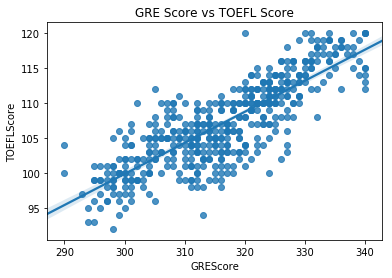

In [81]:
fig = sns.regplot(x=a["GREScore"], y=a["TOEFLScore"])
plt.title("GRE Score vs TOEFL Score")
plt.show()

In [82]:
z=len(a[a.Research==1])
b=len(a[a.Research==0])
print('Total number of students',z+b)
print('Students having Research:',len(a[a.Research==1]))
print('Students not having Research:',len(a[a.Research==0]))

Total number of students 500
Students having Research: 280
Students not having Research: 220


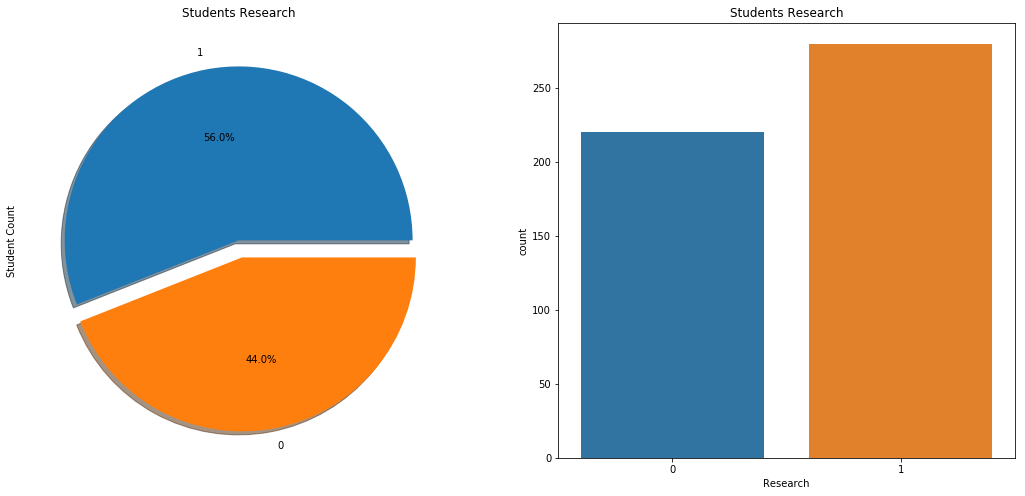

In [83]:
f,ax=plt.subplots(1,2,figsize=(18,8))
a['Research'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Students Research')
ax[0].set_ylabel('Student Count')
sns.countplot('Research',data=a,ax=ax[1])
ax[1].set_title('Students Research')
plt.show()

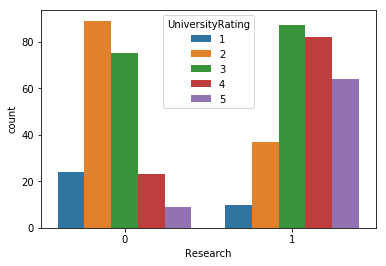

In [84]:
sns.countplot(x='Research', hue='UniversityRating', data=a)
plt.show()

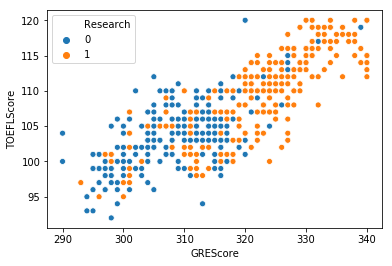

In [85]:
sns.scatterplot(data=a,x='GREScore',y='TOEFLScore',hue='Research')

In [86]:
admt_sort=a.sort_values(by=a.columns[-1],ascending=False)
admt_sort.head()
#admt_sort[(admt_sort['Admit']>0.90)].mean().reset_index()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit,Admit
0,337,118,4,4.5,4.5,9.65,1,0.92,1
267,314,107,3,3.0,3.5,8.17,1,0.73,1
283,321,111,3,2.5,3.0,8.90,1,0.80,1
282,312,106,3,4.0,3.5,8.79,1,0.81,1
281,317,110,3,4.0,4.5,9.11,1,0.80,1


In [87]:
admt_sort[(admt_sort['ChanceOfAdmit']>0.90)].mean().reset_index()

,index,0
0,GREScore,3.328525e+02
1,TOEFLScore,1.162131e+02
2,UniversityRating,4.655738e+00
3,SOP,4.549180e+00
4,LOR,4.516393e+00
5,CGPA,9.523443e+00
6,Research,1.000000e+00
7,ChanceOfAdmit,9.355738e-01
8,Admit,1.821494e+58


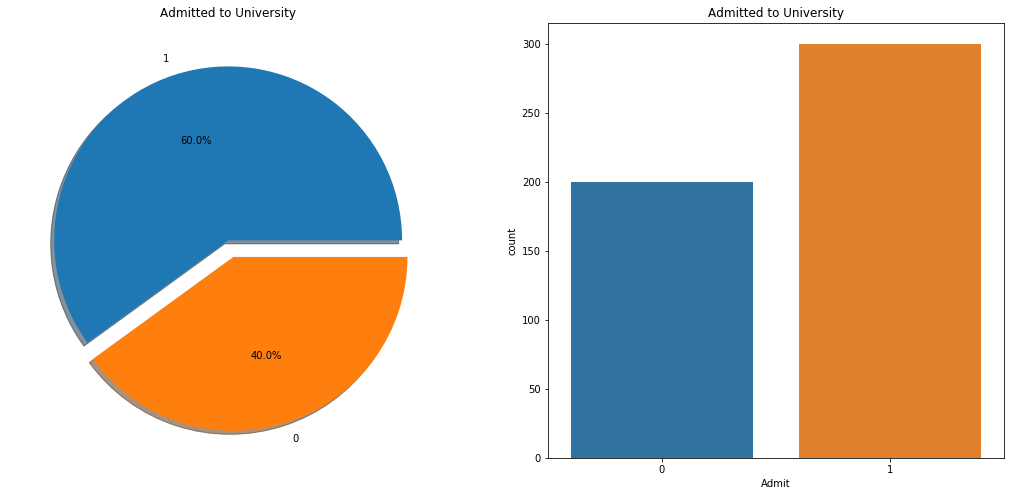

In [88]:
f,ax=plt.subplots(1,2,figsize=(18,8))
a['Admit'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Admitted to University')
ax[0].set_ylabel('')
sns.countplot('Admit',data=a,ax=ax[1])
ax[1].set_title('Admitted to University')
plt.show()

In [98]:
from sklearn.model_selection import train_test_split
X=a[["GREScore","TOEFLScore" ,"UniversityRating","SOP","LOR","CGPA","Research"]]
Z=a[["Admit"]]
y=a[["ChanceOfAdmit"]]

In [99]:
X.head()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [102]:
y.head()

,ChanceOfAdmit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [101]:
Z.head()

,Admit
0,1
1,1
2,1
3,1
4,0


In [108]:
#Splitting into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test,  = train_test_split(X, y,train_size=0.80, random_state=20)

In [109]:
from sklearn.linear_model import LinearRegression # to build linear regression model
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
lrpred=regressor.predict(X_test)

#finding the root mean square error
from sklearn import metrics 

print('Mean Squared Error:', metrics.mean_squared_error(y_test, lrpred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lrpred)))

Mean Squared Error: 0.004232854890757626
Root Mean Squared Error: 0.06506039417923647


In [110]:
# lets try and predict the probablility of an admission based on mock scores
Xnew = [[337,118,4,4.5,4.5,9.65,1]]
# make a prediction
znew = regressor.predict(Xnew)
# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (Xnew[0], znew[0]))

X=[337, 118, 4, 4.5, 4.5, 9.65, 1], Predicted=[0.95035714]


In [96]:
#__________________________________________Random forest________________________________________________-

In [116]:
from sklearn.ensemble import RandomForestRegressor  
rf_model= RandomForestRegressor(n_estimators = 1000,random_state = 123)  
rf_model.fit(X_train, y_train)
rfpred=rf_model.predict(X_test)

from sklearn import metrics 

print('Mean Squared Error:', metrics.mean_squared_error(y_test, rfpred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rfpred)))

Mean Squared Error: 0.004316931758000073
Root Mean Squared Error: 0.06570336184701718


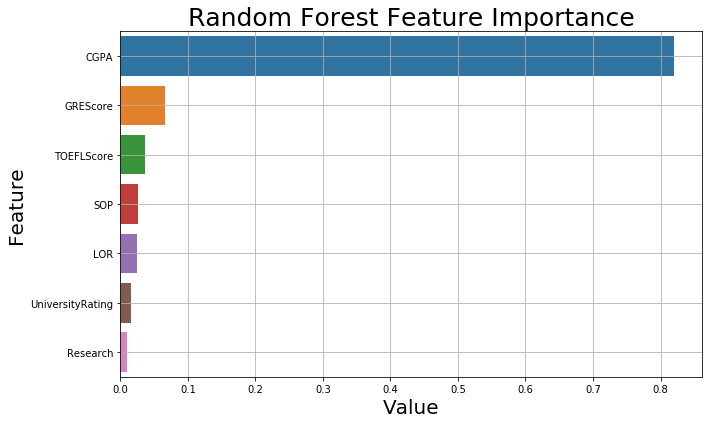

In [117]:
columns=["Admit"]
feature_importance = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns)), columns=['Value','Feature'])
plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))
plt.xlabel('Value',fontsize=20)
plt.ylabel('Feature',fontsize=20)
plt.title('Random Forest Feature Importance',fontsize=25)
plt.grid()
plt.ioff()
plt.tight_layout()

In [118]:
# lets try and predict the probablility of an admission based on mock scores
Xnew2 = [[337,118,4,4.5,4.5,9.65,1]]
# make a prediction
ynew2 = rf_model.predict(Xnew2)
# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (Xnew2[0], ynew2[0]))

X=[337, 118, 4, 4.5, 4.5, 9.65, 1], Predicted=0.9281499999999949


In [39]:
#_________________--Logistic regression_______________________________________________

In [127]:
X2=a[["GREScore","TOEFLScore" ,"UniversityRating","SOP","LOR","CGPA"]]   
Y2=a[["Admit"]] 

In [128]:
X2.head()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA
0,337,118,4,4.5,4.5,9.65
1,324,107,4,4.0,4.5,8.87
2,316,104,3,3.0,3.5,8.00
3,322,110,3,3.5,2.5,8.67
4,314,103,2,2.0,3.0,8.21


In [129]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
Y3 = lab_enc.fit_transform(Y2)

In [130]:
X2_train,X2_test,Y3_train,Y3_test=train_test_split(X2,Y3,test_size=0.2,random_state=0) 


In [131]:
from sklearn.preprocessing import StandardScaler 
sc_X=StandardScaler()
X2_train=sc_X.fit_transform(X2_train)
X2_test=sc_X.fit_transform(X2_test)


In [133]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X2_train,Y3_train)
y_pred_lr=classifier.predict(X2_test)

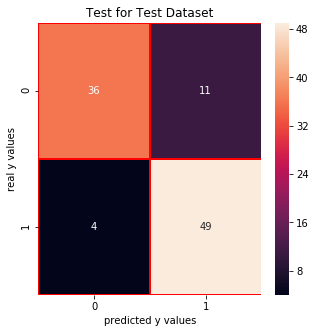

In [134]:
from sklearn.metrics import confusion_matrix  #Class has capital at the begining function starts with small letters 
cm=confusion_matrix(Y3_test,y_pred_lr)
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [135]:
print("Accuracy:",(cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])*100)

Accuracy: 85.0


In [48]:
#______________________KNN_____________________________________________________

In [137]:
from sklearn.neighbors import KNeighborsClassifier
classifier_4=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier_4.fit(X2_train,Y3_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [138]:
y_pred_KNN=classifier_4.predict(X2_test)

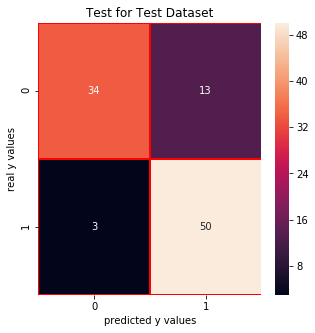

In [139]:
from sklearn.metrics import confusion_matrix  #Class has capital at the begining function starts with small letters 
cm2=confusion_matrix(Y3_test,y_pred_KNN)
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm2,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [141]:
print("Accuracy:",(cm2[0][0]+cm2[1][1])/(cm2[0][0]+cm2[1][1]+cm2[0][1]+cm2[1][0])*100)

Accuracy: 84.0


In [142]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()  
dt.fit(X2_train, Y3_train)
drpred=dt.predict(X2_test)

In [143]:
#finding the root mean square error
from sklearn import metrics 
 
print('Mean Squared Error:', metrics.mean_squared_error(Y3_test, drpred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y3_test, drpred)))

Mean Squared Error: 0.19
Root Mean Squared Error: 0.43588989435406733


In [56]:
#we have succesfully predcited the probability of grad school admissons , however in order to improve our accuracy, we will use K-FOLD CROSS VALIDATION TECHNIQUE

In [149]:
from sklearn.model_selection import cross_val_score

In [150]:
cross_val_score(regressor,X,Y,cv=5,).mean()

0.4761222136193427